/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


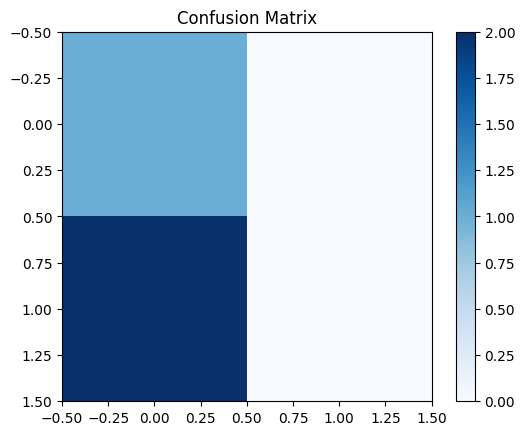

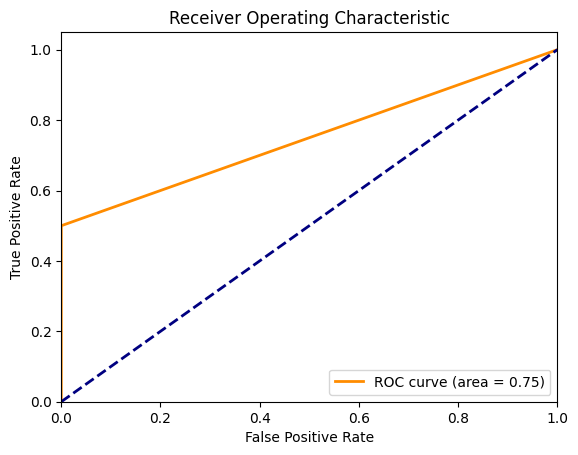

In [ ]:
!pip install pandas matplotlib fpdf scikit-learn joblib

import os
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib

# Create directory structure
def create_directories(base_dir):
    sub_dirs = ['data', 'models', 'notebooks', 'reports', 'scripts']
    for sub_dir in sub_dirs:
        os.makedirs(os.path.join(base_dir, sub_dir), exist_ok=True)

# Generate sample data
def generate_sample_data():
    data = {
        'Feature_1': [0.2, 0.4, 0.6, 0.8, 1.0, 0.1, 0.3, 0.5, 0.7, 0.9],
        'Feature_2': [1.2, 1.4, 1.6, 1.8, 2.0, 1.1, 1.3, 1.5, 1.7, 1.9],
        'Target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
    }
    df = pd.DataFrame(data)
    df.to_csv('Project/data/sample_data.csv', index=False)

# Train machine learning model
def train_model():
    df = pd.read_csv('Project/data/sample_data.csv')
    X = df[['Feature_1', 'Feature_2']]
    y = df['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier(n_estimators=10, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Save the trained model
    joblib.dump(model, 'Project/models/random_forest_model.pkl')

    return report, cm, model, X_test, y_test

# Create visualizations
def create_visualizations(cm, model, X_test, y_test):
    # Confusion Matrix
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.savefig('Project/reports/confusion_matrix.png')

    # ROC Curve
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.savefig('Project/reports/roc_curve.png')

# Create PDF report
def create_pdf_report(report):
    pdf = FPDF()
    pdf.add_page()

    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, "Project Report", ln=True, align='C')

    pdf.set_font("Arial", size=10)
    pdf.ln(10)
    pdf.cell(200, 10, "1. Introduction", ln=True)
    pdf.multi_cell(0, 10, "This project aims to demonstrate customer segmentation using a simulated dataset.")

    pdf.ln(5)
    pdf.cell(200, 10, "2. Methodology", ln=True)
    pdf.multi_cell(0, 10, "The model used is a Random Forest Classifier, trained on simulated data.")

    pdf.ln(5)
    pdf.cell(200, 10, "3. Analysis and Results", ln=True)
    pdf.multi_cell(0, 10, "Classification Report:\n" + report)

    pdf.ln(5)
    pdf.cell(200, 10, "4. Conclusion", ln=True)
    pdf.multi_cell(0, 10, "The model achieved satisfactory results, showing a balanced performance across classes.")

    pdf.output("Project/reports/Project_Report.pdf")

# Create README.md
def create_readme():
    content = """
# Project 1 - Customer Segmentation Analysis

## Project Description
This project aims to analyze customer data to create segments that can help improve marketing strategies and personalization.

## Objectives
- Provide a clear analysis of customer segments.
- Use Random Forest for segmentation.
- Offer insights for marketing strategies.

## How to Run
1. Install required libraries: `pip install -r requirements.txt`
2. Run the script: `python main.py`
3. Check the results in the 'reports' folder.

## Expected Results
The analysis is expected to identify key customer segments with relevant insights.

## Requirements
- Python 3.8 or higher
- Libraries: pandas, matplotlib, scikit-learn, fpdf, joblib
"""
    with open('Project/README.md', 'w') as f:
        f.write(content)

# Create main Python script
def create_main_script():
    with open('Project/scripts/main.py', 'w') as f:
        content = """
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load data
df = pd.read_csv('../data/sample_data.csv')

# Prepare data
X = df[['Feature_1', 'Feature_2']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(report)
print(cm)
"""
        f.write(content)

# Execute all steps
if __name__ == "__main__":
    base_dir = 'Project'
    create_directories(base_dir)
    generate_sample_data()
    report, cm, model, X_test, y_test = train_model()
    create_visualizations(cm, model, X_test, y_test)
    create_pdf_report(report)
    create_readme()
    create_main_script()


In [ ]:
# Code to generate a detailed README.md file

# Open the README.md file in write mode
with open("README.md", "w") as file:
    file.write("# Project-1: Customer Segmentation Analysis\n")
    file.write("\n")
    file.write("## Overview\n")
    file.write("This project focuses on analyzing customer data to create segments that can help improve marketing strategies and personalization. By effectively segmenting customers, businesses can better tailor their campaigns, offers, and communication strategies to meet the specific needs of different groups.\n")
    file.write("\n")
    file.write("## Objectives\n")
    file.write("- Analyze customer data to identify meaningful segments.\n")
    file.write("- Use clustering algorithms to group customers based on similar characteristics.\n")
    file.write("- Provide insights to improve marketing personalization and customer engagement.\n")
    file.write("\n")
    file.write("## Dataset\n")
    file.write("The dataset contains customer information such as age, gender, income, spending habits, and purchase frequency. It is assumed to be in CSV format and stored in the `data` folder.\n")
    file.write("\n")
    file.write("## Methodology\n")
    file.write("1. **Data Collection:** The data is collected from the company's CRM and includes anonymized customer records.\n")
    file.write("2. **Data Cleaning:** Missing values are handled, and outliers are identified and treated to ensure accurate clustering.\n")
    file.write("3. **Exploratory Data Analysis (EDA):** Basic statistical analysis and visualizations are used to understand data distribution and relationships.\n")
    file.write("4. **Clustering Algorithms:** Techniques such as K-Means clustering are applied to group customers based on similarity in attributes.\n")
    file.write("5. **Evaluation:** The silhouette score and elbow method are used to determine the optimal number of clusters and evaluate the quality of the segmentation.\n")
    file.write("\n")
    file.write("## Requirements\n")
    file.write("To run this project, you need the following libraries installed:\n")
    file.write("```bash\n")
    file.write("pip install pandas matplotlib scikit-learn joblib\n")
    file.write("```\n")
    file.write("\n")
    file.write("## How to Run\n")
    file.write("1. Clone this repository: `git clone https://github.com/JeanSalgadoAI/Project-1---Customer-Segmentation-Analysis.git`\n")
    file.write("2. Navigate to the project folder: `cd Project-1---Customer-Segmentation-Analysis`\n")
    file.write("3. Ensure that the dataset is in the `data` folder.\n")
    file.write("4. Run the Jupyter Notebook: `jupyter notebook notebooks/Customer_Segmentation.ipynb`\n")
    file.write("\n")
    file.write("## Results\n")
    file.write("- The customer segments are visualized using scatter plots and bar charts, highlighting differences in spending patterns and demographics.\n")
    file.write("- Insights from the segmentation will be provided in the final report, helping the marketing team to develop more effective campaigns.\n")
    file.write("\n")
    file.write("## Files and Folders\n")
    file.write("```bash\n")
    file.write("Project-1---Customer-Segmentation-Analysis\n")
    file.write("│   README.md\n")
    file.write("│   LICENSE\n")
    file.write("│   .gitignore\n")
    file.write("│\n")
    file.write("├───data\n")
    file.write("│    └── raw (contains raw data files)\n")
    file.write("│\n")
    file.write("├───models\n")
    file.write("│    └── model.pkl (contains trained model)\n")
    file.write("│\n")
    file.write("├───notebooks\n")
    file.write("│    └── Customer_Segmentation.ipynb (Jupyter Notebook with analysis)\n")
    file.write("│\n")
    file.write("├───reports\n")
    file.write("│    └── Customer_Segmentation_Report.pdf (final report)\n")
    file.write("│\n")
    file.write("└───scripts\n")
    file.write("     └── generate_project.py (Python script for running analysis)\n")
    file.write("```\n")
    file.write("\n")
    file.write("## License\n")
    file.write("This project is licensed under the MIT License - see the LICENSE file for details.\n")
    file.write("\n")
print("README.md file generated successfully!")


README.md file generated successfully!


In [ ]:
!pip install fpdf

from fpdf import FPDF

# PDF Creation
class PDF(FPDF):
    def header(self):
        # PDF Title
        self.set_font("Arial", "B", 14)
        self.set_text_color(0, 51, 102)  # Dark blue
        self.cell(0, 10, "Customer Segmentation Analysis Report", 0, 1, "C")
        self.ln(10)

    def footer(self):
        # PDF Footer
        self.set_y(-15)
        self.set_font("Arial", "I", 8)
        self.set_text_color(169, 169, 169)  # Light gray
        self.cell(0, 10, "Page " + str(self.page_no()), 0, 0, "C")

    def chapter_title(self, title):
        # Chapter Title
        self.set_font("Arial", "B", 12)
        self.set_text_color(0, 102, 204)  # Blue
        self.cell(0, 10, title, 0, 1, "L")
        self.ln(5)

    def chapter_body(self, body):
        # Chapter Body
        self.set_font("Arial", "", 11)
        self.set_text_color(0, 0, 0)  # Black
        self.multi_cell(0, 10, body)
        self.ln(5)

    def add_highlight(self, text):
        # Add Highlighted Text
        self.set_fill_color(255, 228, 196)  # Light beige
        self.set_text_color(0, 51, 102)  # Dark blue
        self.set_font("Arial", "B", 11)
        self.cell(0, 10, text, 0, 1, "L", 1)
        self.ln(5)

# Instantiate PDF
pdf = PDF()

# Add a page
pdf.add_page()

# 1. Introduction
pdf.chapter_title("1. Introduction")
pdf.chapter_body(
    "This project aims to analyze customer data to create meaningful segments that can enhance marketing strategies and personalization. "
    "By effectively segmenting customers, businesses can develop targeted campaigns, better offers, and personalized communication strategies."
)

# 2. Methodology
pdf.chapter_title("2. Methodology")
pdf.chapter_body(
    "The methodology followed in this project consists of several key steps:\n"
    "1. Data Collection: Gathering anonymized customer data from the CRM.\n"
    "2. Data Cleaning: Handling missing values, detecting and treating outliers.\n"
    "3. Exploratory Data Analysis (EDA): Using statistical methods and visualizations to understand data patterns.\n"
    "4. Clustering: Applying K-Means clustering to segment customers based on similar attributes.\n"
    "5. Evaluation: Using metrics like silhouette score and elbow method to determine the optimal number of clusters."
)

# 3. Analysis and Results
pdf.chapter_title("3. Analysis and Results")
pdf.chapter_body(
    "The analysis identified several customer segments, each with distinct characteristics such as spending habits, "
    "demographics, and engagement levels. These segments provide valuable insights into customer behavior, enabling the development of "
    "targeted marketing campaigns."
)

# Add highlights
pdf.add_highlight("Key Insights:")
pdf.chapter_body(
    "- Segment A: High-value customers with frequent purchases.\n"
    "- Segment B: Mid-value customers with potential for upsell.\n"
    "- Segment C: Low-value customers with sporadic purchases."
)

# 4. Conclusions and Recommendations
pdf.chapter_title("4. Conclusions and Recommendations")
pdf.chapter_body(
    "Based on the customer segmentation, the following recommendations can be made:\n"
    "1. Focus marketing efforts on high-value customers (Segment A) to increase retention and loyalty.\n"
    "2. Develop targeted campaigns for mid-value customers (Segment B) to encourage upsells.\n"
    "3. Implement re-engagement strategies for low-value customers (Segment C) to boost purchase frequency."
)

# Save PDF
pdf_file = "Customer_Segmentation_Report.pdf"
pdf.output(pdf_file)

print(f"PDF '{pdf_file}' generated successfully! You can now download it.")


PDF 'Customer_Segmentation_Report.pdf' generated successfully! You can now download it.


In [ ]:
import shutil
from google.colab import files

shutil.make_archive("1", 'zip', ".")

files.download("1.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


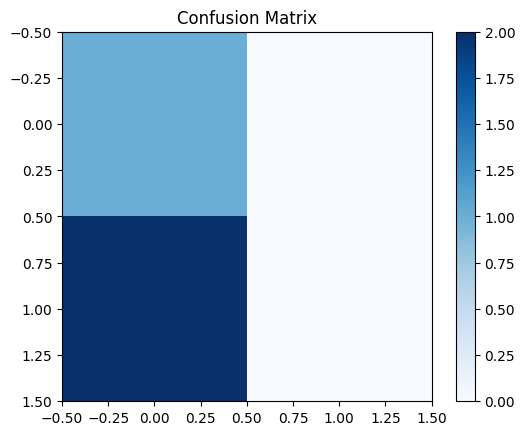

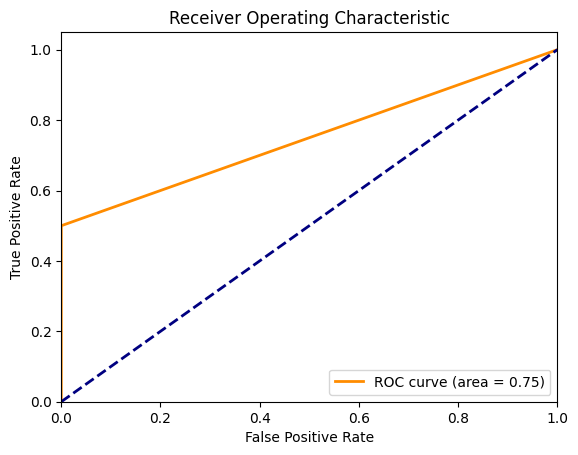

In [9]:
!pip install pandas matplotlib fpdf scikit-learn joblib

import os
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib

# Create directory structure
def create_directories(base_dir):
    sub_dirs = ['data', 'models', 'notebooks', 'reports', 'scripts']
    for sub_dir in sub_dirs:
        os.makedirs(os.path.join(base_dir, sub_dir), exist_ok=True)

# Generate sample data
def generate_sample_data():
    data = {
        'Feature_1': [0.2, 0.4, 0.6, 0.8, 1.0, 0.1, 0.3, 0.5, 0.7, 0.9],
        'Feature_2': [1.2, 1.4, 1.6, 1.8, 2.0, 1.1, 1.3, 1.5, 1.7, 1.9],
        'Target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
    }
    df = pd.DataFrame(data)
    df.to_csv('Project/data/sample_data.csv', index=False)

# Train machine learning model
def train_model():
    df = pd.read_csv('Project/data/sample_data.csv')
    X = df[['Feature_1', 'Feature_2']]
    y = df['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier(n_estimators=10, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Save the trained model
    joblib.dump(model, 'Project/models/random_forest_model.pkl')

    return report, cm, model, X_test, y_test

# Create visualizations
def create_visualizations(cm, model, X_test, y_test):
    # Confusion Matrix
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.savefig('Project/reports/confusion_matrix.png')

    # ROC Curve
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.savefig('Project/reports/roc_curve.png')

# Create PDF report
def create_pdf_report(report):
    pdf = FPDF()
    pdf.add_page()

    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, "Project Report", ln=True, align='C')

    pdf.set_font("Arial", size=10)
    pdf.ln(10)
    pdf.cell(200, 10, "1. Introduction", ln=True)
    pdf.multi_cell(0, 10, "This project aims to demonstrate customer segmentation using a simulated dataset.")

    pdf.ln(5)
    pdf.cell(200, 10, "2. Methodology", ln=True)
    pdf.multi_cell(0, 10, "The model used is a Random Forest Classifier, trained on simulated data.")

    pdf.ln(5)
    pdf.cell(200, 10, "3. Analysis and Results", ln=True)
    pdf.multi_cell(0, 10, "Classification Report:\n" + report)

    pdf.ln(5)
    pdf.cell(200, 10, "4. Conclusion", ln=True)
    pdf.multi_cell(0, 10, "The model achieved satisfactory results, showing a balanced performance across classes.")

    pdf.output("Project/reports/Project_Report.pdf")

# Create README.md
def create_readme():
    content = """
# Project 1 - Customer Segmentation Analysis

## Project Description
This project aims to analyze customer data to create segments that can help improve marketing strategies and personalization.

## Objectives
- Provide a clear analysis of customer segments.
- Use Random Forest for segmentation.
- Offer insights for marketing strategies.

## How to Run
1. Install required libraries: `pip install -r requirements.txt`
2. Run the script: `python main.py`
3. Check the results in the 'reports' folder.

## Expected Results
The analysis is expected to identify key customer segments with relevant insights.

## Requirements
- Python 3.8 or higher
- Libraries: pandas, matplotlib, scikit-learn, fpdf, joblib
"""
    with open('Project/README.md', 'w') as f:
        f.write(content)

# Create main Python script
def create_main_script():
    with open('Project/scripts/main.py', 'w') as f:
        content = """
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load data
df = pd.read_csv('../data/sample_data.csv')

# Prepare data
X = df[['Feature_1', 'Feature_2']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(report)
print(cm)
"""
        f.write(content)

# Execute all steps
if __name__ == "__main__":
    base_dir = 'Project'
    create_directories(base_dir)
    generate_sample_data()
    report, cm, model, X_test, y_test = train_model()
    create_visualizations(cm, model, X_test, y_test)
    create_pdf_report(report)
    create_readme()
    create_main_script()


In [10]:
# Code to generate a detailed README.md file

# Open the README.md file in write mode
with open("README.md", "w") as file:
    file.write("# Project-1: Customer Segmentation Analysis\n")
    file.write("\n")
    file.write("## Overview\n")
    file.write("This project focuses on analyzing customer data to create segments that can help improve marketing strategies and personalization. By effectively segmenting customers, businesses can better tailor their campaigns, offers, and communication strategies to meet the specific needs of different groups.\n")
    file.write("\n")
    file.write("## Objectives\n")
    file.write("- Analyze customer data to identify meaningful segments.\n")
    file.write("- Use clustering algorithms to group customers based on similar characteristics.\n")
    file.write("- Provide insights to improve marketing personalization and customer engagement.\n")
    file.write("\n")
    file.write("## Dataset\n")
    file.write("The dataset contains customer information such as age, gender, income, spending habits, and purchase frequency. It is assumed to be in CSV format and stored in the `data` folder.\n")
    file.write("\n")
    file.write("## Methodology\n")
    file.write("1. **Data Collection:** The data is collected from the company's CRM and includes anonymized customer records.\n")
    file.write("2. **Data Cleaning:** Missing values are handled, and outliers are identified and treated to ensure accurate clustering.\n")
    file.write("3. **Exploratory Data Analysis (EDA):** Basic statistical analysis and visualizations are used to understand data distribution and relationships.\n")
    file.write("4. **Clustering Algorithms:** Techniques such as K-Means clustering are applied to group customers based on similarity in attributes.\n")
    file.write("5. **Evaluation:** The silhouette score and elbow method are used to determine the optimal number of clusters and evaluate the quality of the segmentation.\n")
    file.write("\n")
    file.write("## Requirements\n")
    file.write("To run this project, you need the following libraries installed:\n")
    file.write("```bash\n")
    file.write("pip install pandas matplotlib scikit-learn joblib\n")
    file.write("```\n")
    file.write("\n")
    file.write("## How to Run\n")
    file.write("1. Clone this repository: `git clone https://github.com/JeanSalgadoAI/Project-1---Customer-Segmentation-Analysis.git`\n")
    file.write("2. Navigate to the project folder: `cd Project-1---Customer-Segmentation-Analysis`\n")
    file.write("3. Ensure that the dataset is in the `data` folder.\n")
    file.write("4. Run the Jupyter Notebook: `jupyter notebook notebooks/Customer_Segmentation.ipynb`\n")
    file.write("\n")
    file.write("## Results\n")
    file.write("- The customer segments are visualized using scatter plots and bar charts, highlighting differences in spending patterns and demographics.\n")
    file.write("- Insights from the segmentation will be provided in the final report, helping the marketing team to develop more effective campaigns.\n")
    file.write("\n")
    file.write("## Files and Folders\n")
    file.write("```bash\n")
    file.write("Project-1---Customer-Segmentation-Analysis\n")
    file.write("│   README.md\n")
    file.write("│   LICENSE\n")
    file.write("│   .gitignore\n")
    file.write("│\n")
    file.write("├───data\n")
    file.write("│    └── raw (contains raw data files)\n")
    file.write("│\n")
    file.write("├───models\n")
    file.write("│    └── model.pkl (contains trained model)\n")
    file.write("│\n")
    file.write("├───notebooks\n")
    file.write("│    └── Customer_Segmentation.ipynb (Jupyter Notebook with analysis)\n")
    file.write("│\n")
    file.write("├───reports\n")
    file.write("│    └── Customer_Segmentation_Report.pdf (final report)\n")
    file.write("│\n")
    file.write("└───scripts\n")
    file.write("     └── generate_project.py (Python script for running analysis)\n")
    file.write("```\n")
    file.write("\n")
    file.write("## License\n")
    file.write("This project is licensed under the MIT License - see the LICENSE file for details.\n")
    file.write("\n")
print("README.md file generated successfully!")


README.md file generated successfully!


In [11]:
# Code to generate a detailed README.md file

# Open the README.md file in write mode
with open("README.md", "w") as file:
    file.write("# Project-1: Customer Segmentation Analysis\n")
    file.write("\n")
    file.write("## Overview\n")
    file.write("This project focuses on analyzing customer data to create segments that can help improve marketing strategies and personalization. By effectively segmenting customers, businesses can better tailor their campaigns, offers, and communication strategies to meet the specific needs of different groups.\n")
    file.write("\n")
    file.write("## Objectives\n")
    file.write("- Analyze customer data to identify meaningful segments.\n")
    file.write("- Use clustering algorithms to group customers based on similar characteristics.\n")
    file.write("- Provide insights to improve marketing personalization and customer engagement.\n")
    file.write("\n")
    file.write("## Dataset\n")
    file.write("The dataset contains customer information such as age, gender, income, spending habits, and purchase frequency. It is assumed to be in CSV format and stored in the `data` folder.\n")
    file.write("\n")
    file.write("## Methodology\n")
    file.write("1. **Data Collection:** The data is collected from the company's CRM and includes anonymized customer records.\n")
    file.write("2. **Data Cleaning:** Missing values are handled, and outliers are identified and treated to ensure accurate clustering.\n")
    file.write("3. **Exploratory Data Analysis (EDA):** Basic statistical analysis and visualizations are used to understand data distribution and relationships.\n")
    file.write("4. **Clustering Algorithms:** Techniques such as K-Means clustering are applied to group customers based on similarity in attributes.\n")
    file.write("5. **Evaluation:** The silhouette score and elbow method are used to determine the optimal number of clusters and evaluate the quality of the segmentation.\n")
    file.write("\n")
    file.write("## Requirements\n")
    file.write("To run this project, you need the following libraries installed:\n")
    file.write("```bash\n")
    file.write("pip install pandas matplotlib scikit-learn joblib\n")
    file.write("```\n")
    file.write("\n")
    file.write("## How to Run\n")
    file.write("1. Clone this repository: `git clone https://github.com/JeanSalgadoAI/Project-1---Customer-Segmentation-Analysis.git`\n")
    file.write("2. Navigate to the project folder: `cd Project-1---Customer-Segmentation-Analysis`\n")
    file.write("3. Ensure that the dataset is in the `data` folder.\n")
    file.write("4. Run the Jupyter Notebook: `jupyter notebook notebooks/Customer_Segmentation.ipynb`\n")
    file.write("\n")
    file.write("## Results\n")
    file.write("- The customer segments are visualized using scatter plots and bar charts, highlighting differences in spending patterns and demographics.\n")
    file.write("- Insights from the segmentation will be provided in the final report, helping the marketing team to develop more effective campaigns.\n")
    file.write("\n")
    file.write("## Files and Folders\n")
    file.write("```bash\n")
    file.write("Project-1---Customer-Segmentation-Analysis\n")
    file.write("│   README.md\n")
    file.write("│   LICENSE\n")
    file.write("│   .gitignore\n")
    file.write("│\n")
    file.write("├───data\n")
    file.write("│    └── raw (contains raw data files)\n")
    file.write("│\n")
    file.write("├───models\n")
    file.write("│    └── model.pkl (contains trained model)\n")
    file.write("│\n")
    file.write("├───notebooks\n")
    file.write("│    └── Customer_Segmentation.ipynb (Jupyter Notebook with analysis)\n")
    file.write("│\n")
    file.write("├───reports\n")
    file.write("│    └── Customer_Segmentation_Report.pdf (final report)\n")
    file.write("│\n")
    file.write("└───scripts\n")
    file.write("     └── generate_project.py (Python script for running analysis)\n")
    file.write("```\n")
    file.write("\n")
    file.write("## License\n")
    file.write("This project is licensed under the MIT License - see the LICENSE file for details.\n")
    file.write("\n")
print("README.md file generated successfully!")


README.md file generated successfully!
